# Capstone Project on Healthcare Analytics
#### Based on the dataset, the goal is to create a classification model which will predict if the person has diabetes or not basis parameter like blood pressure, BMI, Glucose, Insulin, etc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('D:/Simplilearn Data Science course/Capstone Project/Project 2/Healthcare - Diabetes/health care diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Visually exploring using histograms

#### 1. Variable Glucose

Text(0.5, 0, 'Glucose')

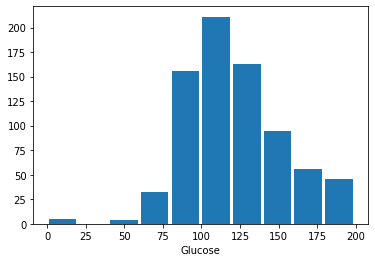

In [7]:
#Creating histogram for Glucose
plt.hist(df['Glucose'],rwidth=0.9)
plt.xlabel('Glucose')

###### As 0 indicates missing value, imputing the missing value by mean

In [8]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())

Text(0.5, 0, 'Glucose')

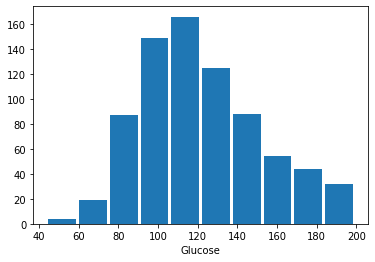

In [9]:
#Viewing the new variable Glucose
plt.hist(df['Glucose'],rwidth=0.9)
plt.xlabel('Glucose')

#### 2. Variable BloodPressure

Text(0.5, 0, 'Blood Pressure')

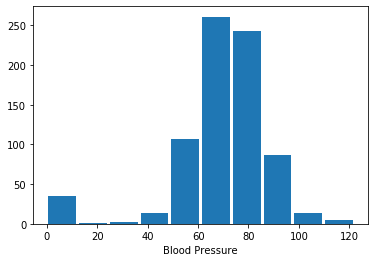

In [10]:
#Creating histogram for BloodPressure
plt.hist(df['BloodPressure'],rwidth=0.9)
plt.xlabel('Blood Pressure')

###### As 0 indicates missing value, imputing the missing value by mean


In [11]:
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())

Text(0.5, 0, 'Blood Pressure')

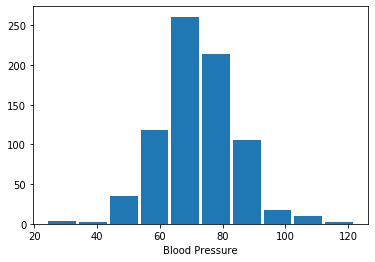

In [12]:
#Viewing the new variable BloodPressure_1
plt.hist(df['BloodPressure'],rwidth=0.9)
plt.xlabel('Blood Pressure')

#### 3. Variable SkinThickness

Text(0.5, 0, 'SkinThickness')

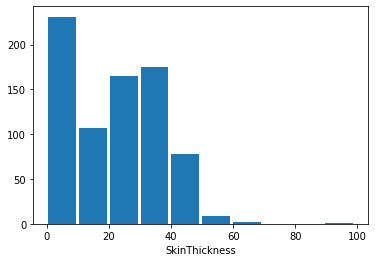

In [13]:
#Creating histogram for SkinThickness
plt.hist(df['SkinThickness'],rwidth=0.9)
plt.xlabel('SkinThickness')

###### As 0 indicates missing value, imputing the missing value by mean


In [14]:
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

Text(0.5, 0, 'SkinThickness')

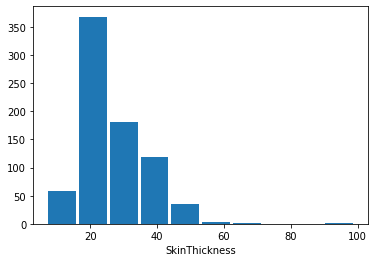

In [15]:
#Viewing new variable SkinThickness_1
plt.hist(df['SkinThickness'],rwidth=0.9)
plt.xlabel('SkinThickness')

#### 4. Variable Insulin

Text(0.5, 0, 'Insulin')

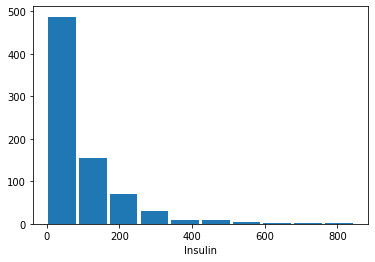

In [16]:
#Creating histogram for Insulin
plt.hist(df['Insulin'],rwidth=0.9)
plt.xlabel('Insulin')

###### As 0 indicates missing value, imputing the missing value by mean


In [17]:
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())

Text(0.5, 0, 'Insulin')

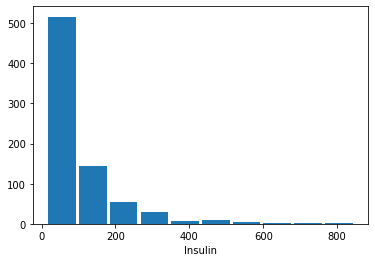

In [18]:
#Viewing the new variable Insulin_1
plt.hist(df['Insulin'],rwidth=0.9)
plt.xlabel('Insulin')

#### 5. Variable BMI

Text(0.5, 0, 'BMI')

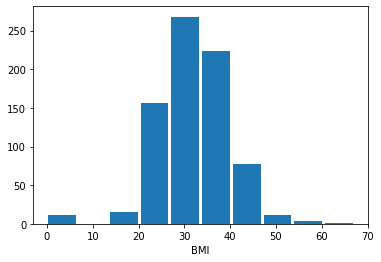

In [19]:
#Creating histogram for Insulin
plt.hist(df['BMI'],rwidth=0.9)
plt.xlabel('BMI')

###### As 0 indicates missing value, imputing the missing value by mean

In [20]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

Text(0.5, 0, 'BMI')

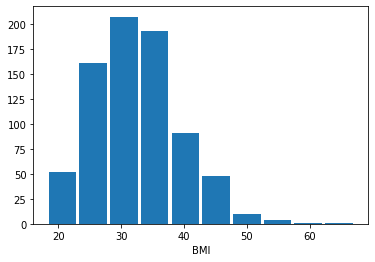

In [21]:
#Viewing the new variable BMI_1
plt.hist(df['BMI'], rwidth=0.9)
plt.xlabel('BMI')

### Plotting types of data and frequency 

In [22]:
#Storing column names and datatypes in a dataframe
Column_List = pd.DataFrame(df.dtypes)

In [23]:
Column_List

,0
Pregnancies,int64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [24]:
#Saving this result as a csv file
Column_List.to_csv('D:/Simplilearn Data Science course/Capstone Project/Project 2/Healthcare - Diabetes/ColumnList.csv', header=False)

In [25]:
#Storing required Column names and file location in variables
column_names=['ColumnName','DataType']
location = 'D:/Simplilearn Data Science course/Capstone Project/Project 2/Healthcare - Diabetes/ColumnList.csv'

In [26]:
Column_List_2 = pd.read_csv(location,names=column_names)

In [27]:
Column_List_2

,ColumnName,DataType
0,Pregnancies,int64
1,Glucose,float64
2,BloodPressure,float64
3,SkinThickness,float64
4,Insulin,float64
5,BMI,float64
6,DiabetesPedigreeFunction,float64
7,Age,int64
8,Outcome,int64


In [28]:
Column_List_2['DataType'].value_counts()

float64    6
int64      3
Name: DataType, dtype: int64

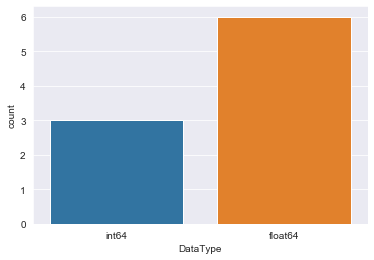

In [29]:
#Creating a plot to showcase the frequency of Integer variables and Float Variables
sns.set_style('darkgrid')
sns.countplot(Column_List_2['DataType'])

#### The plot above shows that there are 2 float type variables and 7 integer type variables in the dataset

## Checking balance of the dataset 

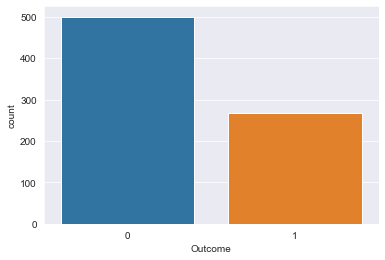

In [30]:
#Creating Bar Graph of the target variable Outcome
sns.countplot(df['Outcome'])

#### Since the % division of both the classes of the target variable which is outcome is around 65%-35%, we can conclude that the dataset is not imbalanced and we would not have to take any steps of re-sampling

## Creating Scatter charts between variables

In [31]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

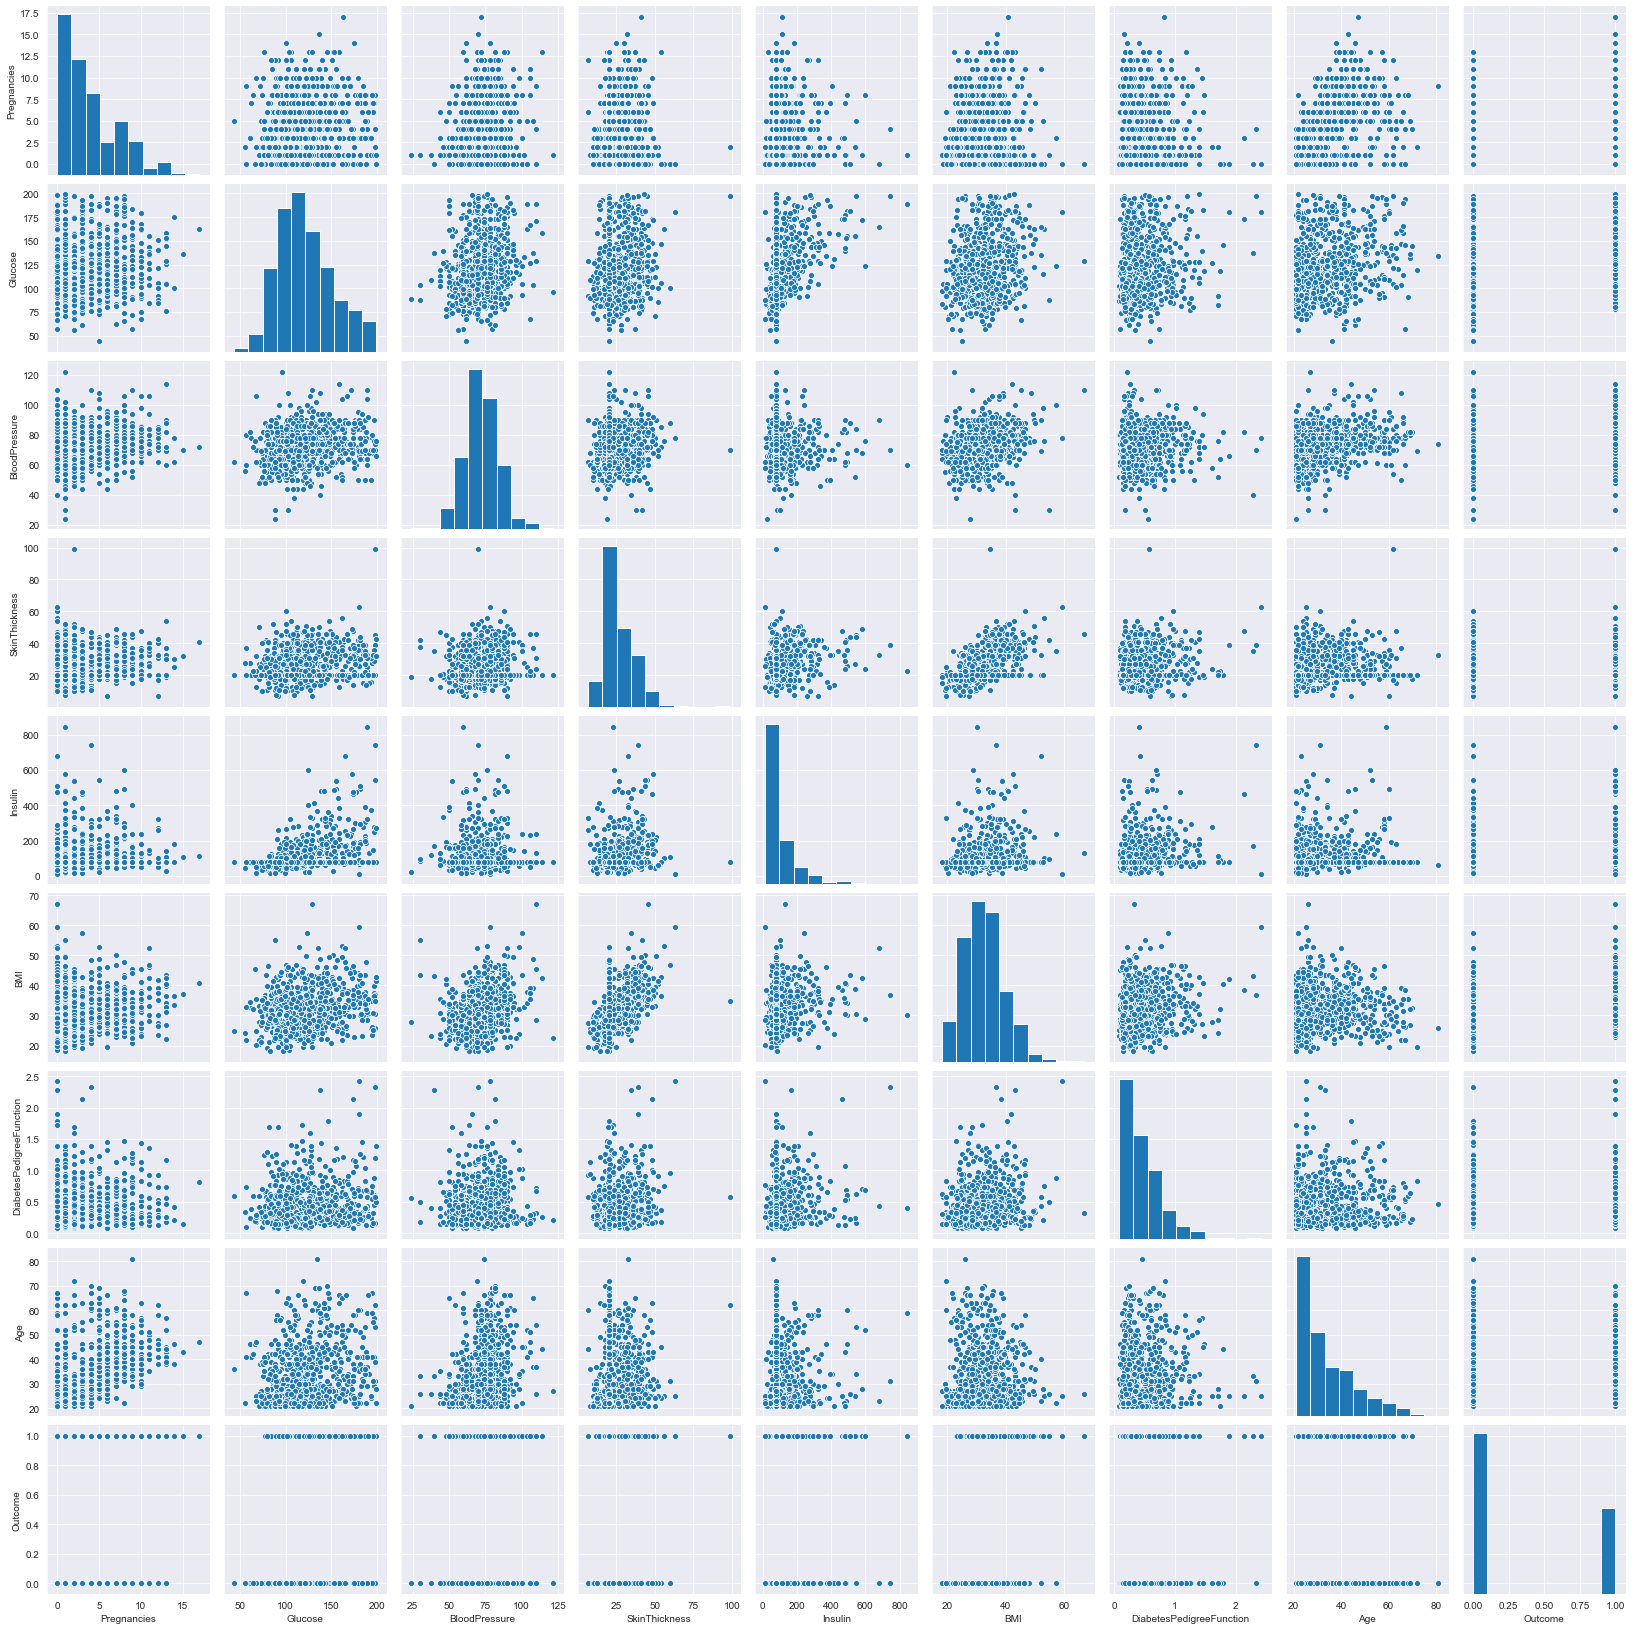

In [32]:
sns.pairplot(df)

#### By only looking at the scatter plots, some coliniearity is observed between BMI and Skin Thickness. More detailed analysis can be done by exploring the correlation values and heatmap

## Correlation Analysis

In [33]:
# Creating correlation table for analysis
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


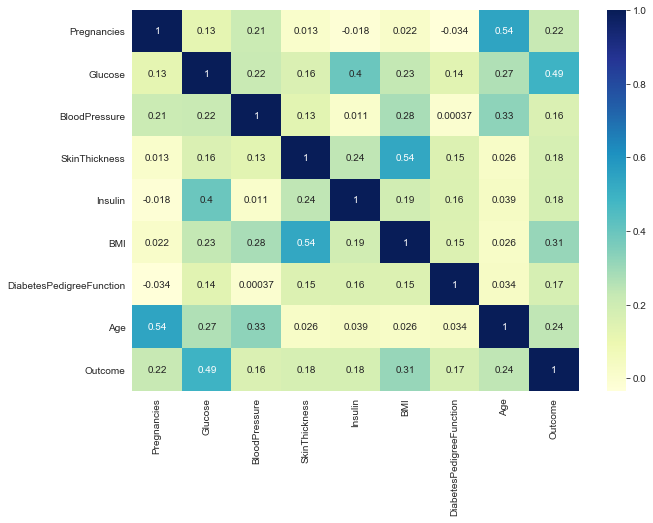

In [34]:
#Visualizing the correlation analysis using Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

#### By the  correlation analysis, it can be determined that :
#### 1. Age & Pregnancy have a high correlation ~ 0.54
#### 2. BMI & SkinThickness have a high correlation ~ 0.54

#### Features affecting Outcome the most are: Glucose (Correlation with Outcome ~ 0.49) and BMI (Correlation with Outcome ~ 0.31)

## Feature Selection

#### Used backward elimintation method for Feature Selection. Used all the features to create the model once, and then started excluding the features having least correlation but it only reduced the accuracy. Hence using all the features to achieve maximum possible accuracy

## Feature Engineering


#### Some feature Engineering was performed during EDA, where 0 indicated missing values and we did missing value imputations.


#### Since the features have different units, we should perform scaling or normalization
#### I tried using both. Scaling using Minmax scaler and Normalization using Standard Scaler. Got better results with Scaling hence will be perofming Scaling here

In [35]:
#Splitting the data into X and y as features and Outcome
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

In [36]:
#Scaling the data using Min MAx Scaler
scaling = MinMaxScaler()
X_Scaled = scaling.fit_transform(X)
X_Scaled

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [37]:
#Splitting into train & test set
X_Scaled_Train , X_Scaled_Test, y_Train, y_Test = train_test_split(X_Scaled,y,test_size=0.2,random_state=0)

In [38]:
print(X_Scaled_Train.shape)
print(X_Scaled_Test.shape)
print(y_Train.shape)
print(y_Test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


# Using different Classification models and evaluating Output



## KNN Classifier 


#### Tried multiple values for n neighbors like 5,10,15,20,25,30 and got the best results for 25. Also according to the so called thumb rule, square root of number of observations the number comes up to 25

In [39]:
#Model Building and prediction
KNN = KNeighborsClassifier(n_neighbors=25)
KNN.fit(X_Scaled_Train,y_Train)
y_pred=KNN.predict(X_Scaled_Test)

KNN Classifier Accuracy Score: 0.8311688311688312

Classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.74      0.68      0.71        47

    accuracy                           0.83       154
   macro avg       0.80      0.79      0.80       154
weighted avg       0.83      0.83      0.83       154
 

ROC-AUC Score: 0.8715450387751044

ROC-AUC Curve: 



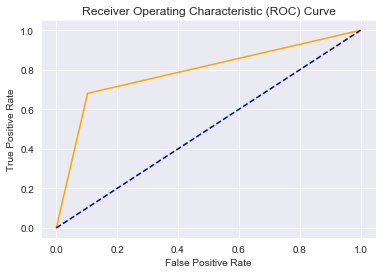


Confusion Matrix: 



array([[96, 11],
       [15, 32]], dtype=int64)

In [54]:
# Accuracy Metrics for KNN

#Accuracy Score
print('KNN Classifier Accuracy Score: {}'.format(metrics.accuracy_score(y_Test,y_pred)))

#Classification Report
print('\nClassification Report: \n')
print(metrics.classification_report(y_Test,y_pred),'\n')

#ROC-AUC Score
y_Test_Prob = KNN.predict_proba(X_Scaled_Test)
print('ROC-AUC Score: {}'.format(metrics.roc_auc_score(y_Test, y_Test_Prob[:,1])))

#ROC-AUC Curve
print('\nROC-AUC Curve: \n')
fpr, tpr, thresholds = metrics.roc_curve(y_Test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

#Confusion Matrix
print('\nConfusion Matrix: \n')
metrics.confusion_matrix(y_Test, y_pred)

## Logistic Regression Classifier

In [41]:
#Model Building and prediction
Logit=LogisticRegression()
Logit.fit(X_Scaled_Train,y_Train)
y_Logit_pred=Logit.predict(X_Scaled_Test)

Logistic Regression Classifier Accuracy Score: 0.8116883116883117

Classification Report: 

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       107
           1       0.75      0.57      0.65        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.80       154
 

ROC-AUC Score: 0.8804931397892224

ROC-AUC Curve: 



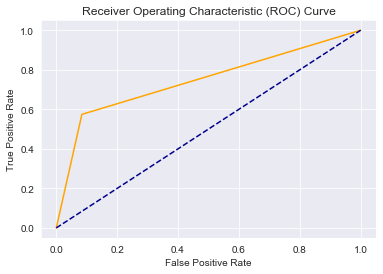


Confusion Matrix: 



array([[98,  9],
       [20, 27]], dtype=int64)

In [55]:
# Accuracy Metrics for Logistic Regression

#Accuracy Score
print('Logistic Regression Classifier Accuracy Score: {}'.format(metrics.accuracy_score(y_Test,y_Logit_pred)))

#Classification Report
print('\nClassification Report: \n')
print(metrics.classification_report(y_Test,y_Logit_pred),'\n')

#ROC-AUC Score
y_Logit_Test_Prob = Logit.predict_proba(X_Scaled_Test)
print('ROC-AUC Score: {}'.format(metrics.roc_auc_score(y_Test, y_Logit_Test_Prob[:,1])))

#ROC-AUC Curve
print('\nROC-AUC Curve: \n')
fpr, tpr, thresholds = metrics.roc_curve(y_Test, y_Logit_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

#Confusion Matrix
print('\nConfusion Matrix: \n')
metrics.confusion_matrix(y_Test,y_Logit_pred)

## Random Forest Classifier

In [43]:
#Model Building and prediction
rf_model = RandomForestClassifier()
rf_model.fit(X_Scaled_Train,y_Train)
y_rf_pred=rf_model.predict(X_Scaled_Test)

Random Forest Classifier Accuracy Score: 0.8116883116883117

Classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154
 

ROC-AUC Score: 0.8671704116126466

ROC-AUC Curve: 



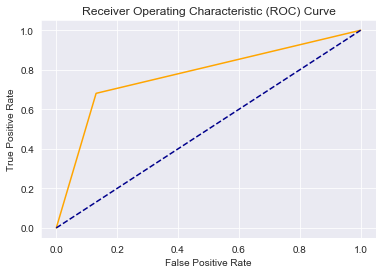

In [44]:
# Accuracy Metrics for Random Forest

#Accuracy Score
print('Random Forest Classifier Accuracy Score: {}'.format(metrics.accuracy_score(y_Test,y_rf_pred)))

#Classification Report
print('\nClassification Report: \n')
print(metrics.classification_report(y_Test,y_rf_pred),'\n')

#ROC-AUC Score
y_rf_Prob = rf_model.predict_proba(X_Scaled_Test)
print('ROC-AUC Score: {}'.format(metrics.roc_auc_score(y_Test, y_rf_Prob[:,1])))

#ROC-AUC Curve
print('\nROC-AUC Curve: \n')
fpr, tpr, thresholds = metrics.roc_curve(y_Test, y_rf_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

### Using Randomized Search CV to perform hyperparameter tuning and check if Accuracy can be increased

In [45]:
est = RandomForestClassifier(n_jobs=-1)

rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }

In [46]:
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score


In [47]:
rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X_Scaled_Train, y_Train)
rf_parameters

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [48]:
#Predicting using new parameters
RF_Classifier = RandomForestClassifier(n_estimators=1000,criterion='gini',max_depth=5,bootstrap=True)
RF_Classifier.fit(X_Scaled_Train,y_Train)
Y_RCV_Pred = RF_Classifier.predict(X_Scaled_Test)

Random Forest Classifier Accuracy Score: 0.8181818181818182

Classification Report: 

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154
 

ROC-AUC Score: 0.8699542652614833

ROC-AUC Curve: 



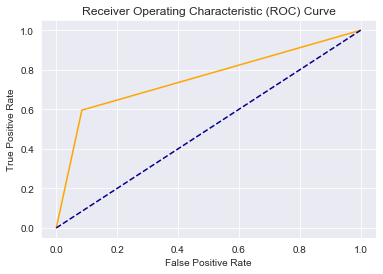


Confusion Matrix: 



array([[98,  9],
       [19, 28]], dtype=int64)

In [58]:
# Accuracy Metrics for Random Forest after Randomized CV

#Accuracy Score
print('Random Forest Classifier Accuracy Score: {}'.format(metrics.accuracy_score(y_Test,Y_RCV_Pred)))

#Classification Report
print('\nClassification Report: \n')
print(metrics.classification_report(y_Test,Y_RCV_Pred),'\n')

#ROC-AUC Score
y_rcv_Test_Prob = RF_Classifier.predict_proba(X_Scaled_Test)
print('ROC-AUC Score: {}'.format(metrics.roc_auc_score(y_Test, y_rcv_Test_Prob[:,1])))

#ROC-AUC Curve
print('\nROC-AUC Curve: \n')
fpr, tpr, thresholds = metrics.roc_curve(y_Test, Y_RCV_Pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

#Confusion Matrix
print('\nConfusion Matrix: \n')
metrics.confusion_matrix(y_Test,Y_RCV_Pred)

## Support Vector Machine (SVM) Classifier

In [50]:
#Model Building and prediction
Svc = SVC(kernel = 'linear', random_state = 0)
Svc.fit(X_Scaled_Train,y_Train)
y_Svc_Pred = Svc.predict(X_Scaled_Test)

In [51]:
# Accuracy Metrics for SVM

#Accuracy Score
print('SVM Classifier Accuracy Score: {}'.format(metrics.accuracy_score(y_Test,y_Svc_Pred)))

#Classification Report
print('\nClassification Report: \n')
print(metrics.classification_report(y_Test,y_Svc_Pred),'\n')

SVM Classifier Accuracy Score: 0.7987012987012987

Classification Report: 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       107
           1       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154
 



# Classification Report

## Comparing the output from different models to evaulate which model would be the best fit for the use case

#### SVM gave less accuracy compared to other models which were in the range of 81-83

#### In the use case that we have, we have to predict if the person is having diabetes or not. If we predict that the person has Diabetes and the prediction is wrong, it is still okay since the person will go for further tests and find out he/she does not have diabetes. But, if we predict that a person does not have diabetes but our prediction is wrong, that is a huge problem here. Hence according to the scenario give, we have to focus on having less False Negatives. Hence the focus would be on the model with more recall or less false negative predictions

#### For the use case we have here, the best fit model would be Random Forest Classifier. If we commpare the confusion matrices, Random forest has 2 more True Positives and 2 less False Negatives as compared to KNN and the maximum recall which is 92. Both Random forest and KNN have an AUC ROC score of around 87, and even though Random Forest classifier has 1 point less accruacy score, the better recall makes up for it! 